In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime, timezone

# Convert ISO 8601 date strings to Unix timestamp (milliseconds)
def iso_to_unix(iso_str):
    dt = datetime.strptime(iso_str, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    return int(dt.timestamp() * 1000)  # Convert to milliseconds

def unix_to_iso(unix_timestamp_ms):
    # Convert milliseconds to seconds
    unix_timestamp_s = unix_timestamp_ms / 1000
    # Create a datetime object from the Unix timestamp
    dt = datetime.utcfromtimestamp(unix_timestamp_s)
    # Format the datetime object as an ISO 8601 date string
    iso_str = dt.strftime("%Y-%m-%dT%H:%M:%SZ")
    return iso_str

In [3]:
data = pd.read_csv('trade_log/balance_log.csv', header=None)
data.columns = ['time','balance']
data['time'] = pd.to_datetime(data['time'])
data

,time,balance
0,2024-01-22 22:08:31,36.051343
1,2024-01-22 23:18:54,34.189696
2,2024-01-23 03:49:21,35.730587
3,2024-01-23 04:04:47,37.278616
4,2024-01-23 04:16:43,38.783905
5,2024-01-23 04:40:50,39.958212
6,2024-01-23 05:10:12,37.611163
7,2024-01-23 07:46:35,35.887567
8,2024-01-23 11:33:09,34.158928
9,2024-01-23 17:12:27,32.394128


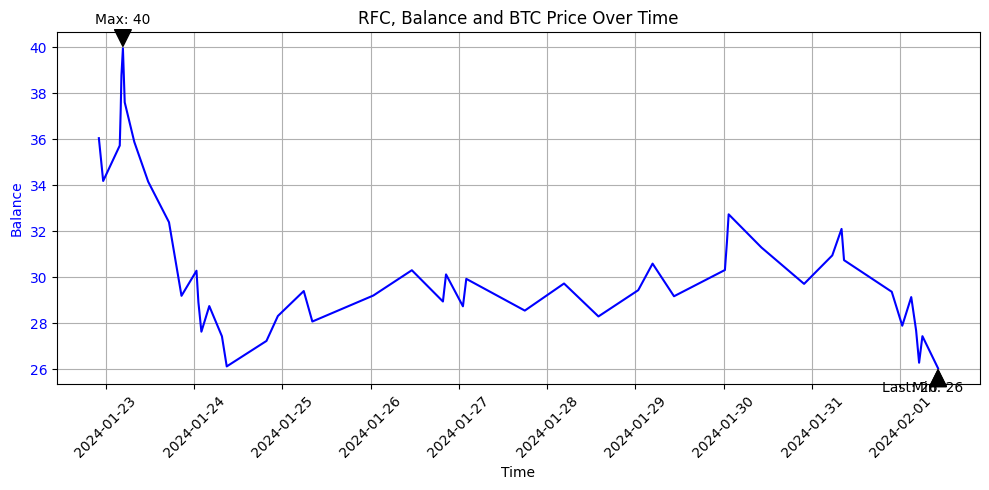

In [4]:
# Load and process trades data


# Find the maximum and last balance values
max_balance = data['balance'].max()
min_balance = data['balance'].min()
last_balance = data['balance'].iloc[-1]

time_of_max_balance = data[data['balance'] == max_balance]['time'].iloc[0]
time_of_min_balance = data[data['balance'] == min_balance]['time'].iloc[0]
last_time = data['time'].iloc[-1]

max_balance = round(max_balance)
min_balance = round(min_balance)
last_balance = round(last_balance)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot balance on the primary y-axis
ax1.plot(data['time'], data['balance'], linestyle='-', color='blue', label='Balance')
# ax1.set_ylim(500, 1500)
ax1.set_xlabel('Time')
ax1.set_ylabel('Balance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)


# Annotate the maximum balance
ax1.annotate(f'Max: {max_balance}', 
                xy=(time_of_max_balance, max_balance), 
                xytext=(time_of_max_balance, max_balance + 1),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')  # Horizontal alignment

# Annotate the minimum balance
ax1.annotate(f'Min: {min_balance}', 
                xy=(time_of_min_balance, min_balance), 
                xytext=(time_of_min_balance, min_balance - 1),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')  # Horizontal alignment

# Annotate the last balance
ax1.annotate(f'Last: {last_balance}', 
                xy=(last_time, last_balance), 
                xytext=(last_time, last_balance - 1),  # Adjust text position
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='right')  # Horizontal alignment

# Set the title and layout
plt.title(f'RFC, Balance and BTC Price Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
fig.tight_layout()  # Adjust layout

# Add a legend
lines, labels = ax1.get_legend_handles_labels()

# Save the figure
# fig.savefig(f'Figures/RFC.png')
plt.show()
plt.close(fig)